# 📓  02_eda_creditcard.ipynb (Bank Data Exploration)

In [1]:
# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# ## 2. Load Data
credit_data = pd.read_csv('../data/raw/creditcard.csv')
print(f"📊 Dataset shape: {credit_data.shape}")
print(f"📋 Columns: {credit_data.columns.tolist()}")
credit_data.head()

📊 Dataset shape: (284807, 31)
📋 Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# ## 3. Data Quality Check
print("🔍 Checking data quality...")

# Check data types
print("\n📋 Data Types:")
print(credit_data.dtypes)

# Check missing values
print("\n❓ Missing Values:")
print(credit_data.isnull().sum())

# Check duplicates
print(f"\n🔍 Duplicate rows: {credit_data.duplicated().sum()}")

print("\n✅ Data quality check completed!")

🔍 Checking data quality...

📋 Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

❓ Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class  

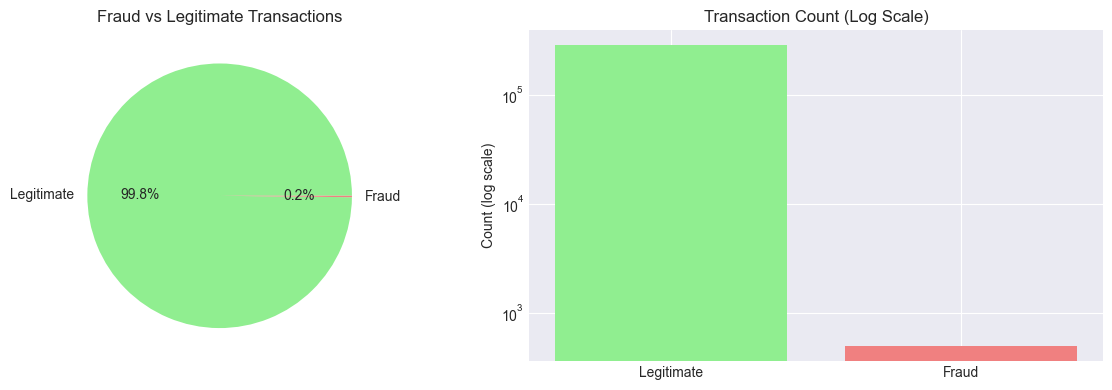

📈 Fraud rate: 0.172749%
📊 Legitimate transactions: 284,315
📊 Fraudulent transactions: 492
📉 Imbalance ratio: 578:1


In [4]:
# ## 4. Target Variable Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
class_counts = credit_data['Class'].value_counts()
axes[0].pie(class_counts, labels=['Legitimate', 'Fraud'], 
           autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Fraud vs Legitimate Transactions')

# Log scale for better visualization
legit_count = class_counts[0]
fraud_count = class_counts[1]
axes[1].bar(['Legitimate', 'Fraud'], [legit_count, fraud_count], 
           color=['lightgreen', 'lightcoral'])
axes[1].set_yscale('log')  # Log scale because of huge imbalance
axes[1].set_title('Transaction Count (Log Scale)')
axes[1].set_ylabel('Count (log scale)')

plt.tight_layout()
plt.show()

print(f"📈 Fraud rate: {credit_data['Class'].mean():.6%}")
print(f"📊 Legitimate transactions: {legit_count:,}")
print(f"📊 Fraudulent transactions: {fraud_count:,}")
print(f"📉 Imbalance ratio: {legit_count/fraud_count:.0f}:1")


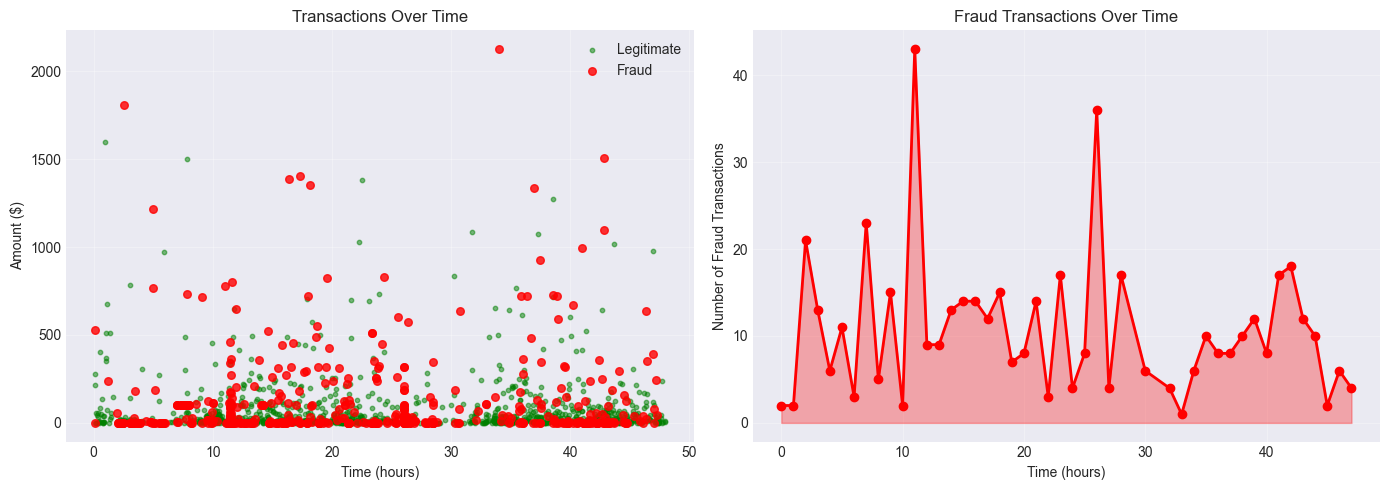

In [5]:
# ## 5. Time Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Convert time from seconds to hours
credit_data['Time_hours'] = credit_data['Time'] / 3600

# Fraud by time
axes[0].scatter(credit_data[credit_data['Class'] == 0]['Time_hours'].sample(1000),
                credit_data[credit_data['Class'] == 0]['Amount'].sample(1000),
                alpha=0.5, label='Legitimate', color='green', s=10)
axes[0].scatter(credit_data[credit_data['Class'] == 1]['Time_hours'],
                credit_data[credit_data['Class'] == 1]['Amount'],
                alpha=0.8, label='Fraud', color='red', s=30)
axes[0].set_title('Transactions Over Time')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Amount ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Fraud distribution by time
fraud_by_hour = credit_data[credit_data['Class'] == 1].groupby(
    credit_data['Time_hours'] // 1  # Group by hour
)['Class'].count()

axes[1].plot(fraud_by_hour.index, fraud_by_hour.values, 
            color='red', linewidth=2, marker='o')
axes[1].fill_between(fraud_by_hour.index, 0, fraud_by_hour.values, 
                     alpha=0.3, color='red')
axes[1].set_title('Fraud Transactions Over Time')
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Number of Fraud Transactions')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

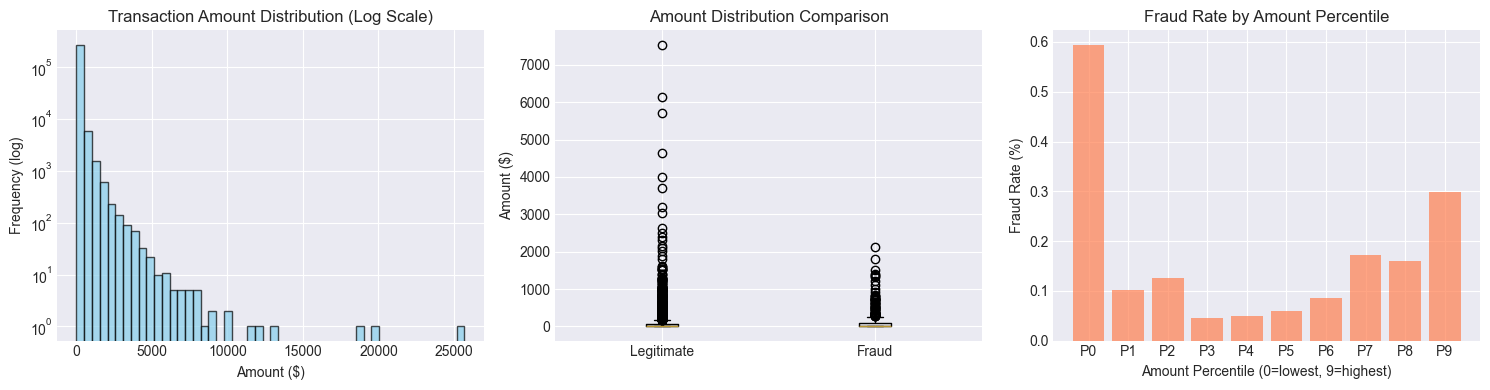

In [6]:
# ## 6. Amount Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Amount distribution (log scale)
axes[0].hist(credit_data['Amount'], bins=50, log=True, 
            alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Transaction Amount Distribution (Log Scale)')
axes[0].set_xlabel('Amount ($)')
axes[0].set_ylabel('Frequency (log)')

# Amount distribution for fraud vs legit
fraud_amounts = credit_data[credit_data['Class'] == 1]['Amount']
legit_amounts = credit_data[credit_data['Class'] == 0]['Amount'].sample(len(fraud_amounts) * 10)

axes[1].boxplot([legit_amounts, fraud_amounts], labels=['Legitimate', 'Fraud'])
axes[1].set_title('Amount Distribution Comparison')
axes[1].set_ylabel('Amount ($)')

# Amount vs fraud
bins = pd.qcut(credit_data['Amount'], q=10, duplicates='drop')
amount_fraud_rate = credit_data.groupby(bins)['Class'].mean()

axes[2].bar(range(len(amount_fraud_rate)), amount_fraud_rate.values * 100, 
           color='coral', alpha=0.7)
axes[2].set_title('Fraud Rate by Amount Percentile')
axes[2].set_xlabel('Amount Percentile (0=lowest, 9=highest)')
axes[2].set_ylabel('Fraud Rate (%)')
axes[2].set_xticks(range(len(amount_fraud_rate)))
axes[2].set_xticklabels([f'P{i}' for i in range(len(amount_fraud_rate))])

plt.tight_layout()
plt.show()


📊 Analyzing PCA features (V1-V28)...


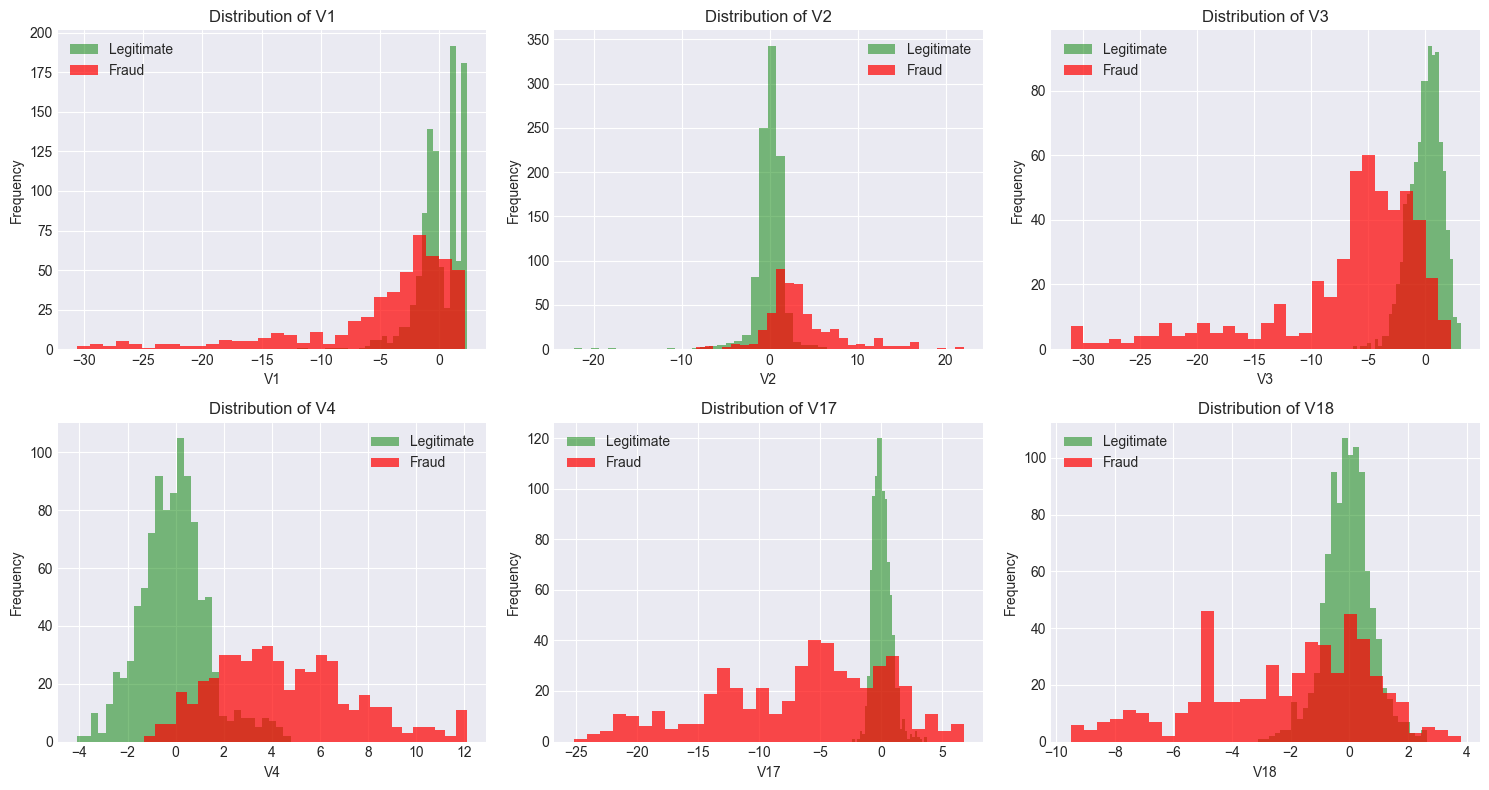

In [7]:
# ## 7. PCA Features Analysis (V1-V28)
print("📊 Analyzing PCA features (V1-V28)...")

# Select a few PCA features to visualize
sample_features = ['V1', 'V2', 'V3', 'V4', 'V17', 'V18']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(sample_features):
    # Plot distribution for fraud vs legit
    axes[idx].hist(credit_data[credit_data['Class'] == 0][feature].sample(1000), 
                  bins=30, alpha=0.5, label='Legitimate', color='green')
    axes[idx].hist(credit_data[credit_data['Class'] == 1][feature], 
                  bins=30, alpha=0.7, label='Fraud', color='red')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()


🔗 Checking correlations...


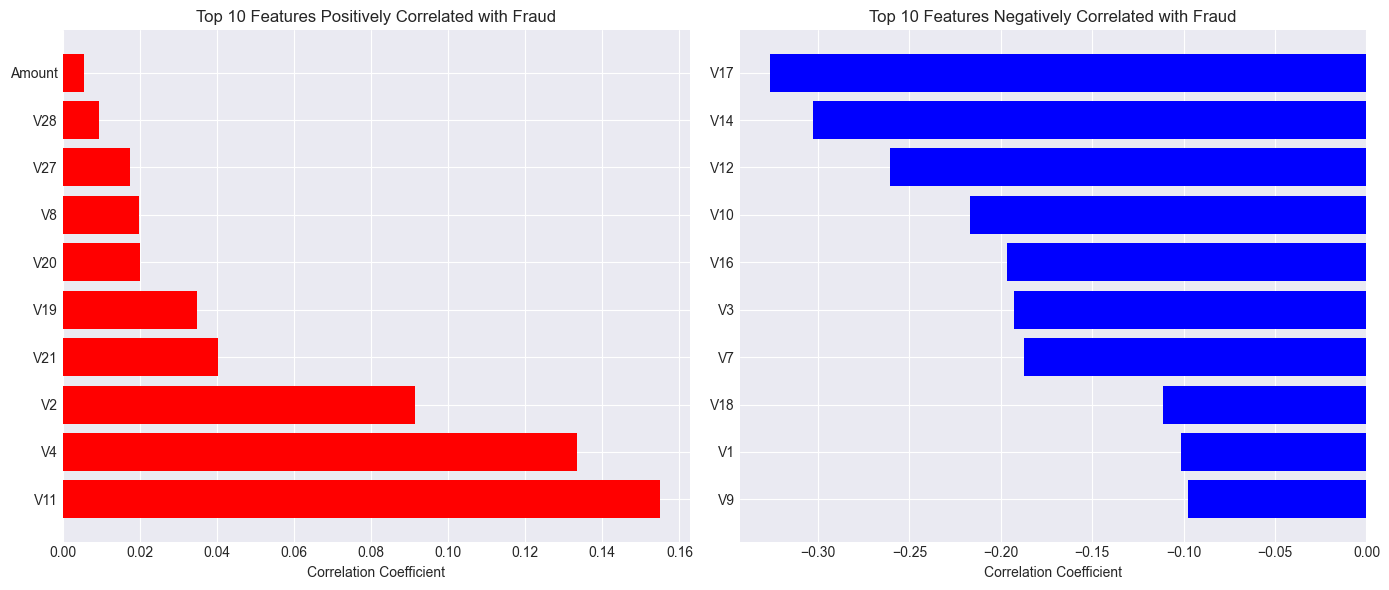

In [8]:
# ## 8. Correlation Analysis
print("🔗 Checking correlations...")

# Calculate correlation with target
correlations = credit_data.corr()['Class'].sort_values(ascending=False)

# Top 10 positively correlated features
top_pos = correlations[1:11]  # Skip Class itself
# Top 10 negatively correlated features  
top_neg = correlations[-10:]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive correlations
axes[0].barh(range(len(top_pos)), top_pos.values, color='red')
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index)
axes[0].set_title('Top 10 Features Positively Correlated with Fraud')
axes[0].set_xlabel('Correlation Coefficient')

# Negative correlations
axes[1].barh(range(len(top_neg)), top_neg.values, color='blue')
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index)
axes[1].set_title('Top 10 Features Negatively Correlated with Fraud')
axes[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


In [9]:
# ## 9. Save Insights
print("💾 Saving insights...")

insights = {
    'fraud_rate': float(credit_data['Class'].mean()),
    'total_transactions': len(credit_data),
    'fraud_count': int(credit_data['Class'].sum()),
    'avg_amount': float(credit_data['Amount'].mean()),
    'fraud_avg_amount': float(credit_data[credit_data['Class'] == 1]['Amount'].mean()),
    'legit_avg_amount': float(credit_data[credit_data['Class'] == 0]['Amount'].mean()),
    'max_correlated_feature': correlations.index[1],
    'max_correlation': float(correlations.iloc[1])
}

# Save cleaned data
credit_data.to_csv('../data/processed/creditcard_cleaned.csv', index=False)

# Save insights
import json
with open('../data/processed/creditcard_eda_insights.json', 'w') as f:
    json.dump(insights, f, indent=4)

print("✅ EDA completed!")
print("\n📊 Key Insights:")
for key, value in insights.items():
    print(f"   {key}: {value}")

💾 Saving insights...
✅ EDA completed!

📊 Key Insights:
   fraud_rate: 0.001727485630620034
   total_transactions: 284807
   fraud_count: 492
   avg_amount: 88.34961925093134
   fraud_avg_amount: 122.21132113821139
   legit_avg_amount: 88.29102242231328
   max_correlated_feature: V11
   max_correlation: 0.15487564474394433
